In [1]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
plt.style.use ('seaborn')
from sklearn.svm import SVR
from sklearn import metrics


C:\Users\mohammad\AppData\Local\Temp\ipykernel_2356\2946318416.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use ('seaborn')


In [37]:
data = pd.read_excel("C:\\Users\\mohammad\\Downloads\\GRB_Final_Document.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GRB                         368 non-null    object 
 1   BAT RA (J2000)              368 non-null    float64
 2   BAT Dec (J2000)             368 non-null    float64
 3   XRT Spectral Index (Gamma)  368 non-null    float64
 4   XRT Column Density (NH)     368 non-null    float64
 5   BAT Fluence                 368 non-null    float64
 6   BAT T90                     368 non-null    float64
 7   Redshift                    368 non-null    float64
dtypes: float64(7), object(1)
memory usage: 23.1+ KB


In [38]:
df = data.iloc[:, 3:8]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   XRT Spectral Index (Gamma)  368 non-null    float64
 1   XRT Column Density (NH)     368 non-null    float64
 2   BAT Fluence                 368 non-null    float64
 3   BAT T90                     368 non-null    float64
 4   Redshift                    368 non-null    float64
dtypes: float64(5)
memory usage: 14.5 KB


In [5]:
df.describe()

,XRT Spectral Index (Gamma),XRT Column Density,XRT Early Flux,BAT T90,Redshift
count,235.000000,2.350000e+02,2.350000e+02,235.000000,235.000000
mean,2.008603,6.013521e+00,2.604255e+11,114.756340,1.984834
std,0.566313,9.018874e+00,3.992248e+12,141.297856,1.233458
min,1.466040,7.380000e-13,4.600000e-02,0.210000,0.036800
25%,1.839375,9.847600e-01,8.900000e+01,33.250000,1.045000
50%,1.959960,3.027660e+00,2.680000e+02,71.100000,1.770000
75%,2.078425,7.388715e+00,7.160000e+02,152.200000,2.701000
max,9.998000,7.664700e+01,6.120000e+13,1088.000000,6.000000


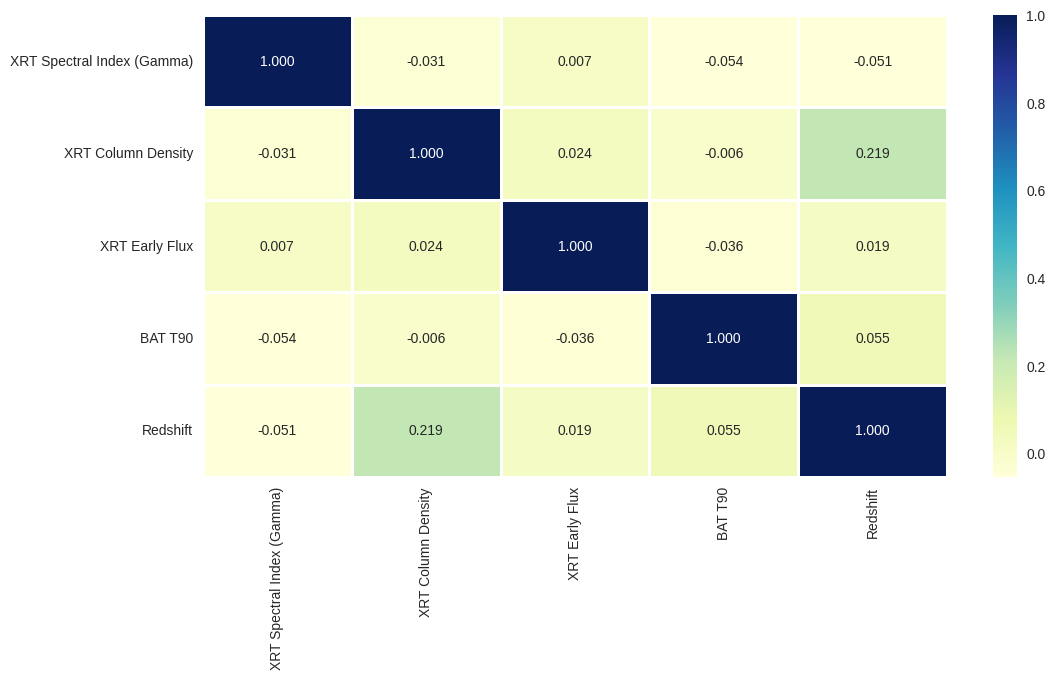

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.3f',linewidths=2)
plt.show()

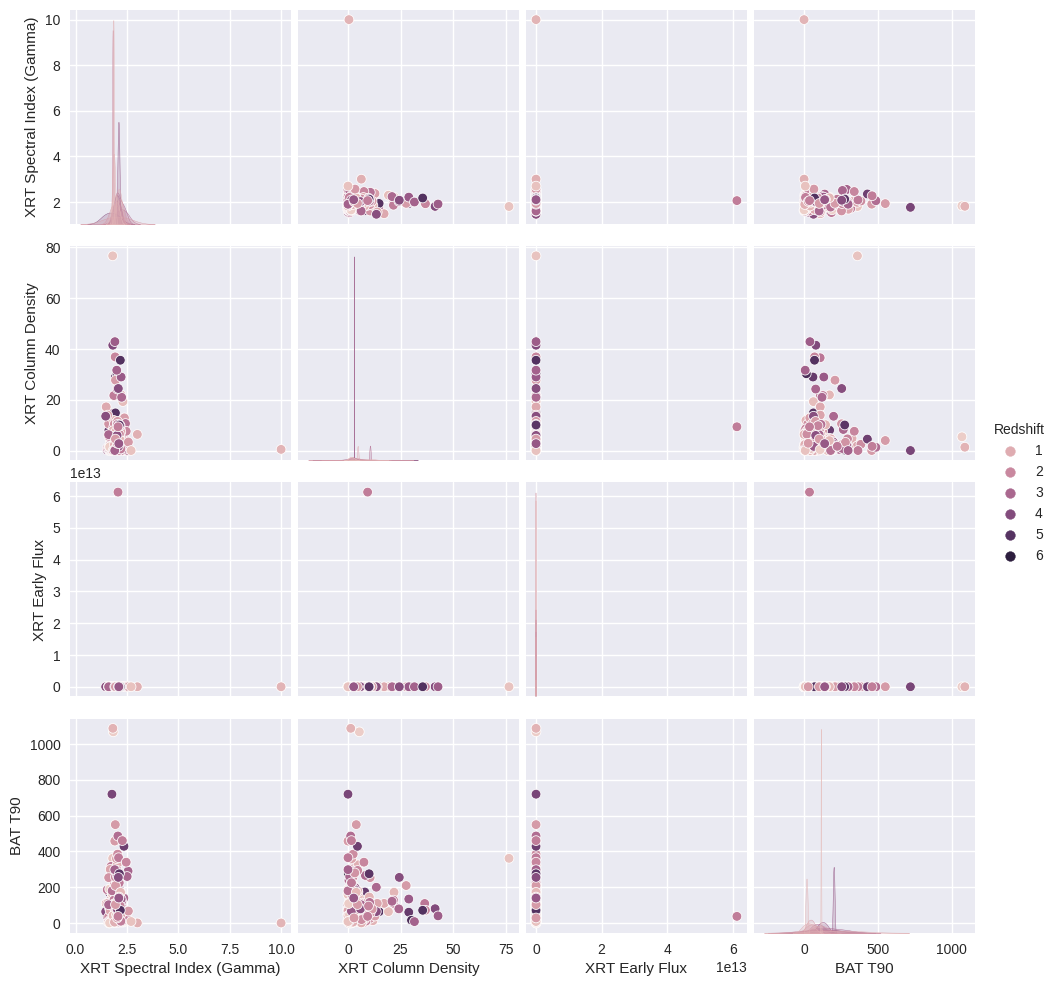

In [ ]:
sns.pairplot(data=df ,hue="Redshift" )

In [39]:
x= df.iloc[:, 0:4]
y= df.iloc[:,-1]


In [40]:
#Dividing the data into two parts, training and testing
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_test , x_validation , y_test , y_validation = train_test_split(x_test , y_test , test_size = 0.2 , random_state= 42)
np.random.seed(18)


model = SVR()
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(model, x_train, y_train, cv=10)
print('Cross-validation scores:', cv_scores)



Cross-validation scores: [ 0.30009042 -0.16186551 -0.00965878 -0.08069842 -0.13665008  0.02814161
 -0.04426718  0.04146667  0.00571868  0.04777511]


In [41]:
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [42]:
y_pred = svr_model.predict(x_test)

In [44]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

svr_model.fit(x_train, y_train)
y_pred_train = svr_model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 train Score:", r2_train)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 test Score:", r2_test)


R^2 train Score: 0.10339019489664403
Mean Squared Error: 1.811529596360951
Root Mean Squared Error: 1.345930754667918
Mean Absolute Error: 1.0768671001754317
R^2 test Score: 0.031141271472528542


#no hyper paramether


C:\Users\mohammad\AppData\Local\Temp\ipykernel_11224\3036419617.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, palette="viridis")


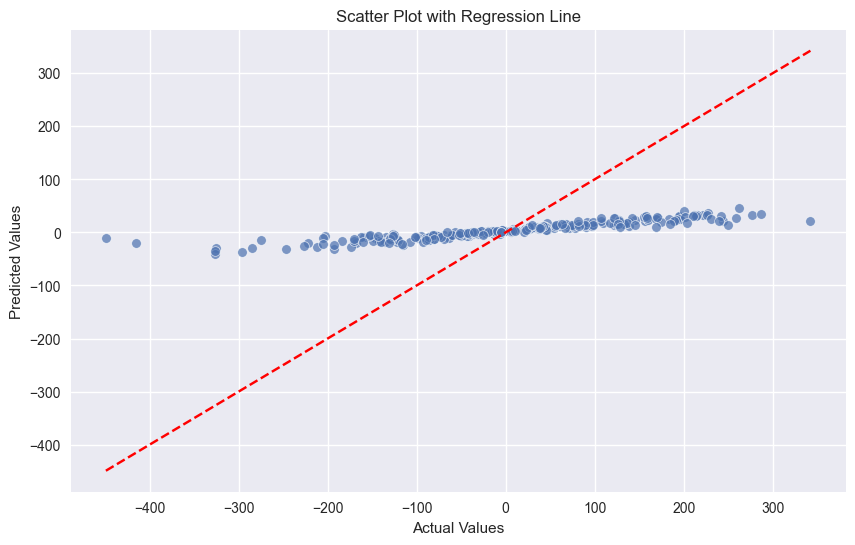

In [33]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, palette="viridis")

sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


C:\Users\mohammad\AppData\Local\Temp\ipykernel_11224\2265834294.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test - y_pred, kde=True, color="skyblue", bins=30 )


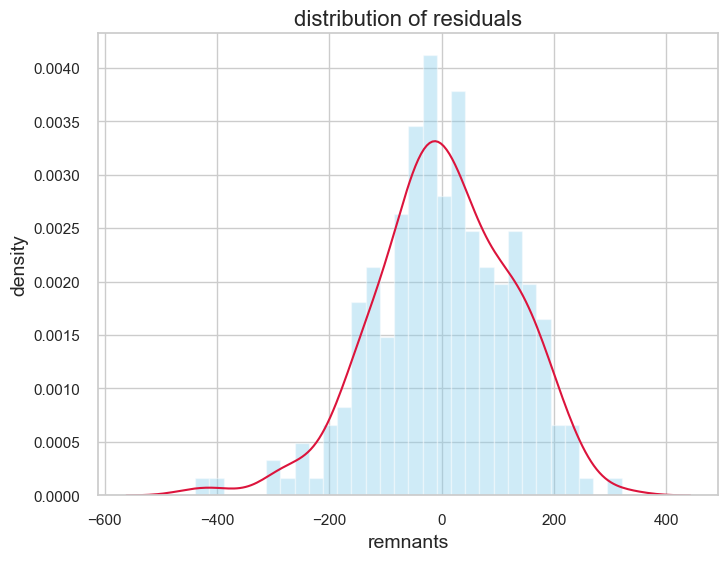

In [34]:

sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(8, 6))
ax = sns.distplot(y_test - y_pred, kde=True, color="skyblue", bins=30 )
ax.lines[0].set_color('crimson')
ax.set_title('distribution of residuals', fontsize=16)
ax.set_xlabel('remnants', fontsize=14)
ax.set_ylabel('density', fontsize=14)

plt.savefig("residuals_standard.png", dpi=300, bbox_inches="tight")
plt.show()

<Axes: xlabel='NORM(Redshift)', ylabel='count'>

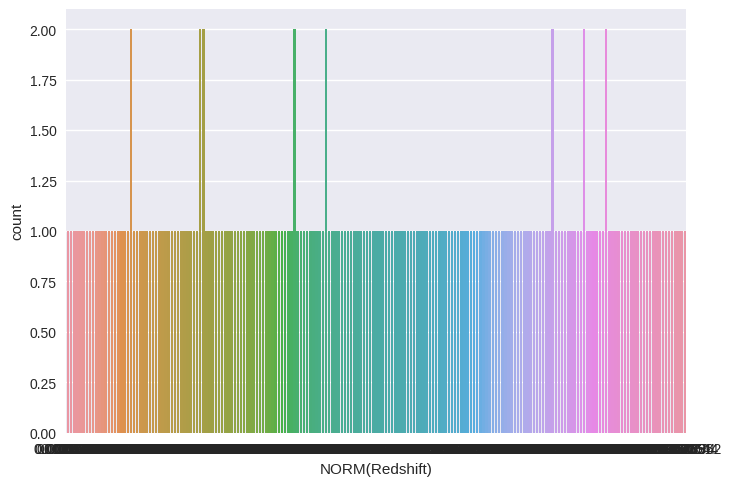

In [ ]:
sns.countplot (x='NORM(Redshift)', data=df)